![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [1]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
mercury capri 2000,23.0,4,122.0,86.0,2220,14.0,71,usa
oldsmobile vista cruiser,12.0,8,350.0,180.0,4499,12.5,73,usa
ford fairmont (man),25.1,4,140.0,88.0,2720,15.4,78,usa
vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
plymouth horizon,34.2,4,105.0,70.0,2200,13.2,79,usa


## Feature Selection

- Select 2 columns for the modelling

In [2]:
df_mpg2 = df_mpg.iloc[:,[2,3]]

In [3]:
df_mpg2

,displacement,horsepower
name,,
chevrolet chevelle malibu,307.0,130.0
buick skylark 320,350.0,165.0
plymouth satellite,318.0,150.0
amc rebel sst,304.0,150.0
ford torino,302.0,140.0
...,...,...
ford mustang gl,140.0,86.0
vw pickup,97.0,52.0
dodge rampage,135.0,84.0


## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [4]:
df_mpg2.isnull().sum()

displacement    0
horsepower      6
dtype: int64

In [5]:
df_mpg2 = df_mpg2.dropna()

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(X=df_mpg2)

MinMaxScaler()

In [9]:
import pandas as pd

In [10]:
df_scaled = pd.DataFrame(scaler.transform(df_mpg2),columns=df_mpg2.columns,index=df_mpg2.index)

In [11]:
df_scaled

,displacement,horsepower
name,,
chevrolet chevelle malibu,0.617571,0.456522
buick skylark 320,0.728682,0.646739
plymouth satellite,0.645995,0.565217
amc rebel sst,0.609819,0.565217
ford torino,0.604651,0.510870
...,...,...
ford mustang gl,0.186047,0.217391
vw pickup,0.074935,0.032609
dodge rampage,0.173127,0.206522


## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [12]:
from sklearn.cluster import KMeans

In [13]:
model_km = KMeans(n_clusters=3)

### Calculate Predictions

In [14]:
model_km.fit_predict(X=df_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1,

### Create a New DataFrame for the Predictions

In [15]:
df_mpg2['pred_km'] = model_km.fit_predict(X=df_scaled)

/var/folders/pq/69_jbdsx3n11hq2k3mhv13gm0000gn/T/ipykernel_8888/1299570834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mpg2['pred_km'] = model_km.fit_predict(X=df_scaled)


### Visualize the Model

In [16]:
import seaborn as sns

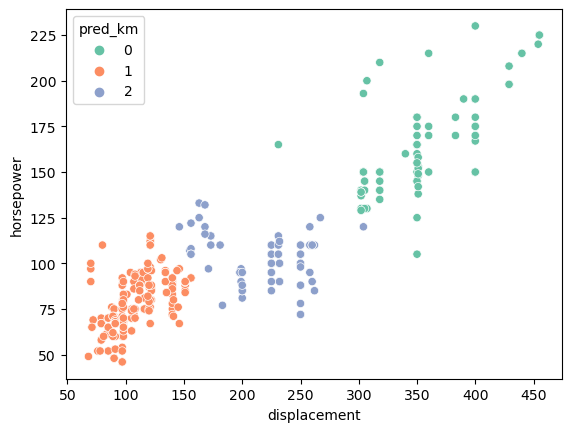

In [17]:
sns.scatterplot(x=df_mpg2.displacement,y=df_mpg2.horsepower,hue=df_mpg2.pred_km,palette='Set2',data=df_mpg2);

- You colour the points with the the value of the predictions

In [18]:
sns.scatterplot

<function seaborn.relational.scatterplot(*, x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha=None, x_jitter=None, y_jitter=None, legend='auto', ax=None, **kwargs)>

## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Other Model 1

#### Fit the Model

- To cluster 3 groups

In [19]:
from sklearn.cluster import Birch

In [20]:
model_b = Birch(n_clusters=3)

In [21]:
model_b.fit(X=df_scaled)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


Birch()

#### Calculate Predictions

In [22]:
model_b.fit_predict(X=df_scaled)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Create a New Column for the Predictions

In [23]:
df_mpg2['pred_b']=model_b.fit_predict(X=df_scaled)

/Applications/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_birch.py:752: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(
/var/folders/pq/69_jbdsx3n11hq2k3mhv13gm0000gn/T/ipykernel_8888/4039540462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mpg2['pred_b']=model_b.fit_predict(X=df_scaled)


#### Visualize the Model

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

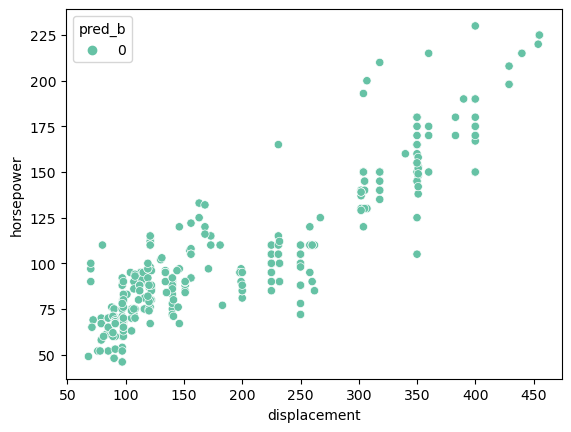

In [25]:
sns.scatterplot(x=df_mpg2.displacement,y=df_mpg2.horsepower,hue=df_mpg2.pred_b,palette='Set2',data=df_mpg2)

### Other Model 2

In [26]:
from sklearn.cluster import MeanShift

In [27]:
model_ms=MeanShift()

#### Fit the Model

- To cluster 3 groups

In [28]:
model_ms.fit(X=df_scaled)

MeanShift()

#### Calculate Predictions

In [29]:
model_ms.fit_predict(X=df_scaled)

array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0,

#### Create a New Column for the Predictions

In [30]:
df_mpg2['pred_ms']=model_ms.fit_predict(X=df_scaled)

/var/folders/pq/69_jbdsx3n11hq2k3mhv13gm0000gn/T/ipykernel_8888/1607827546.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mpg2['pred_ms']=model_ms.fit_predict(X=df_scaled)


#### Visualize the Model

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

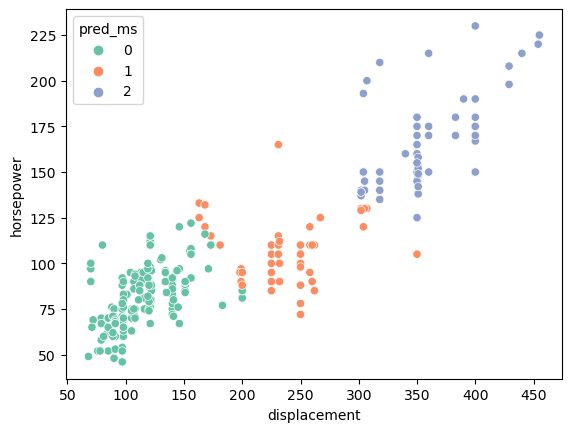

In [31]:
sns.scatterplot(x=df_mpg2.displacement,y=df_mpg2.horsepower,hue=df_mpg2.pred_ms,palette='Set2',data=df_mpg2)

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [x] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [x] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [x] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [x] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [x] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.